# Домашнее задание "Продвинутая оптимизация".

### Задание

При фиксированном `seed=42` поэкспериментируйте с параметрами алгоритма [differential_evolution](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.differential_evolution.html): strategy, popsize, mutation.

Постройте графики количества итераций (`nit`) оптимизации [функции ackley](https://en.wikipedia.org/wiki/Ackley_function) от значения параметра. 

Подробнее о результате выдачи [тут](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.OptimizeResult.html).

In [1]:
import numpy as np
from scipy.optimize import differential_evolution
import matplotlib.pyplot as plt
from scipy.spatial import distance

%matplotlib inline

In [2]:
def ackley(x):
    arg1 = -0.2 * np.sqrt(0.5 * (x[0] ** 2 + x[1] ** 2))
    arg2 = 0.5 * (np.cos(2. * np.pi * x[0]) + np.cos(2. * np.pi * x[1]))
    return -20. * np.exp(arg1) - np.exp(arg2) + 20. + np.e

bounds = [(-10, 10), (-10, 10)]

result = differential_evolution(ackley, bounds, seed=42)
result

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 2793
     nit: 90
 success: True
       x: array([0., 0.])

In [4]:
strategies = ['best1bin','best1exp','rand1bin','rand1exp','rand2bin','rand2exp','randtobest1bin','randtobest1exp','currenttobest1bin','currenttobest1exp','best2exp','best2bin']
mutation = np.arange(0, 2, 0.1)
popsize = np.arange(0, 2, 0.2)

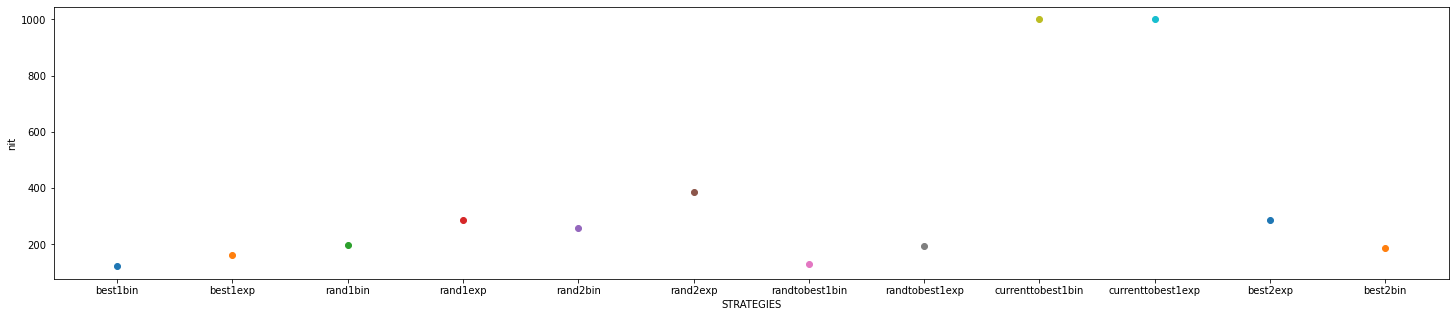

In [8]:

plt.figure(figsize=(25,5)) 
plt.xlabel('STRATEGIES')
plt.ylabel('nit')

for strat in strategies:

    result = differential_evolution(ackley, bounds, strategy=strat, updating='deferred', seed=42)
   
    plt.scatter(strat, result.nit)

plt.show()
        


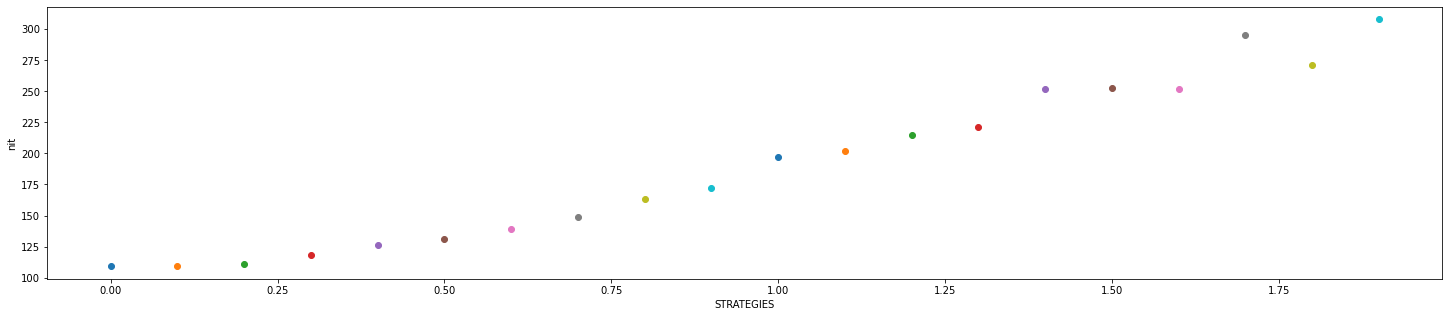

In [11]:
mutation = np.arange(0, 2, 0.1)
popsize = np.arange(0, 2, 0.5)


plt.figure(figsize=(25,5)) 
plt.xlabel('STRATEGIES')
plt.ylabel('nit')

for i in mutation:

    result = differential_evolution(ackley, bounds, strategy='randtobest1bin', mutation=(i, 1), updating='deferred', seed=42)
   
    plt.scatter(i, result.nit)

plt.show()
        

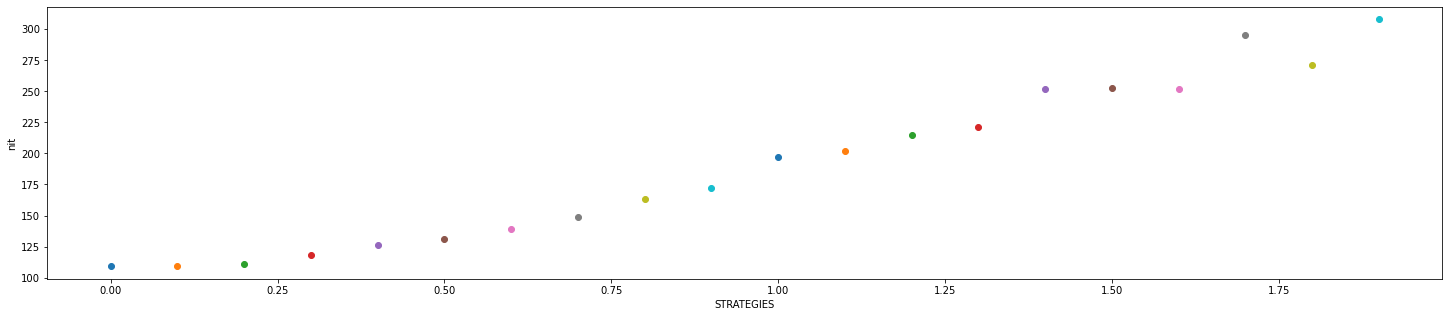

In [12]:
mutation = np.arange(0, 2, 0.1)
popsize = np.arange(0, 2, 0.5)


plt.figure(figsize=(25,5)) 
plt.xlabel('MUTATION')
plt.ylabel('nit')

for i in mutation:

    result = differential_evolution(ackley, bounds, strategy='randtobest1bin', mutation=(1, i), updating='deferred', seed=42)
   
    plt.scatter(i, result.nit)

plt.show()

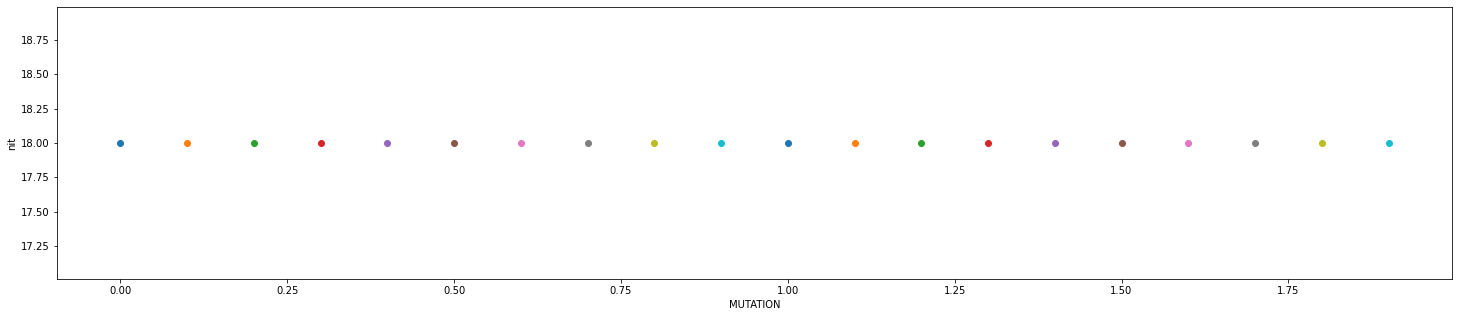

In [14]:
mutation = np.arange(0, 2, 0.1)
popsize = np.arange(0, 2, 0.5)


plt.figure(figsize=(25,5)) 
plt.xlabel('MUTATION')
plt.ylabel('nit')

for i in mutation:

    result = differential_evolution(ackley, bounds, strategy='randtobest1bin', popsize = i, updating='deferred', seed=42)
   
    plt.scatter(i, result.nit)

plt.show()

### Дополнительное задание


Поэкспериментируйте с параметрами и оптимизацией через [minimize](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html):

In [15]:
from scipy.optimize import minimize

x0 = [0,0]

result_m = minimize(ackley, x0,  method='Nelder-Mead')
result_m

 final_simplex: (array([[ 0.00000000e+00,  0.00000000e+00],
       [-1.60675049e-05, -8.45336914e-06],
       [-1.40380859e-06, -3.11279297e-05]]), array([4.44089210e-16, 5.13604405e-05, 8.81584216e-05]))
           fun: 4.440892098500626e-16
       message: 'Optimization terminated successfully.'
          nfev: 17
           nit: 8
        status: 0
       success: True
             x: array([0., 0.])

In [17]:
methods = ['Nelder-Mead','Powell','CG','BFGS','Newton-CG','L-BFGS-B','TNC','COBYLA','SLSQP','trust-const','dogleg','trust-ncg','trust-exact','trust-krylov']

ValueError: Jacobian is required for Newton-CG method

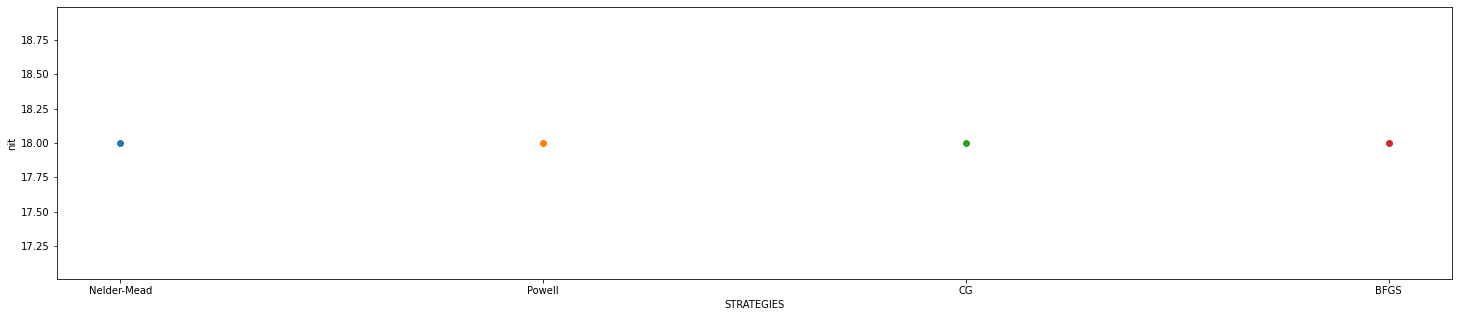

In [19]:
plt.figure(figsize=(25,5)) 
plt.xlabel('STRATEGIES')
plt.ylabel('nit')

for method in methods:

    result_m = minimize(ackley, x0,  method = method)
   
    plt.scatter(method, result.nit)

plt.show()
        


Вы также можете поэкспериментировать с [другими методами оптимизации](https://habr.com/ru/company/prequel/blog/568496/), но это не обязательно для зачета.
